Generally following:<br>
https://medium.com/data-from-the-trenches/text-classification-the-first-step-toward-nlp-mastery-f5f95d525d73<br>
https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [145]:
import pprint
import re
import random
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text
from sklearn.linear_model import SGDClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
adventure_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Adventure\\*.txt')
adventure_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Adventure\\*.csv')

gothic_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Gothic Fiction\\*.txt')
gothic_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Gothic Fiction\\*.csv')

horror_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Horror\\*.txt')
horror_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Horror\\*.csv')

humor_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Humor\\*.txt')
humor_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Humor\\*.csv')

mystery_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Mystery Fiction\\*.txt')
mystery_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Mystery Fiction\\*.csv')

scifi_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Science Fiction\\*.txt')
scifi_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Science Fiction\\*.csv')

western_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Western\\*.txt')
western_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Western\\*.csv')

In [3]:
print('adventure: ',len(adventure_text_files), len(adventure_csv_files))
print('gothic: ',len(gothic_text_files), len(gothic_csv_files))
print('horror: ',len(horror_text_files), len(horror_csv_files))
print('humor: ',len(humor_text_files), len(humor_csv_files))
print('mystery: ',len(mystery_text_files), len(mystery_csv_files))
print('scifi: ',len(scifi_text_files), len(scifi_csv_files))
print('western: ',len(western_text_files), len(western_csv_files))

adventure:  64 63
gothic:  23 22
horror:  39 38
humor:  139 138
mystery:  12 11
scifi:  917 916
western:  79 78


In [4]:
endText = '_Meta_Data.csv'

for file in adventure_text_files:
    testText = file[:-4] + endText
    if testText not in adventure_csv_files:
        adventure_text_files.remove(file)
        
for file in gothic_text_files:
    testText = file[:-4] + endText
    if testText not in gothic_csv_files:
        gothic_text_files.remove(file)
                
for file in horror_text_files:
    testText = file[:-4] + endText
    if testText not in horror_csv_files:
        horror_text_files.remove(file)        

for file in humor_text_files:
    testText = file[:-4] + endText
    if testText not in humor_csv_files:
        humor_text_files.remove(file)

for file in mystery_text_files:
    testText = file[:-4] + endText
    if testText not in mystery_csv_files:
        mystery_text_files.remove(file)
        
for file in scifi_text_files:
    testText = file[:-4] + endText
    if testText not in scifi_csv_files:
        scifi_text_files.remove(file)
        
for file in western_text_files:
    testText = file[:-4] + endText
    if testText not in western_csv_files:
        western_text_files.remove(file)

In [5]:
random.seed(42)
max_files = 80
humor_text_files = random.sample(humor_text_files, max_files)
scifi_text_files = random.sample(scifi_text_files, max_files)

In [6]:
texts = []
cats = []

for file in adventure_text_files:
    fileCat = 'adventure'
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

for file in gothic_text_files:
    fileCat = 'gothic'
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'horror'
for file in horror_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'humor'
for file in humor_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'mystery'
for file in mystery_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'scifi'
for file in scifi_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'western'
for file in western_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)


In [7]:
print(len(texts), len(cats))

372 372


In [8]:
all_data = pd.DataFrame(np.array(texts))
all_data['Category'] = cats
all_data.columns = ["text", "category"]

In [9]:
all_data.head()

,text,category
0,﻿The Project Gutenberg EBook of Affair in Arab...,adventure
1,ï»¿The Project Gutenberg EBook of Allan and th...,adventure
2,ï»¿The Project Gutenberg eBook of Allan Quater...,adventure
3,ï»¿The Project Gutenberg EBook of Allanâs Wi...,adventure
4,﻿The Project Gutenberg EBook of Around the Wor...,adventure


In [10]:
all_data.describe()

,text,category
count,372,372
unique,357,7
top,ï»¿The Project Gutenberg EBook of The Works of...,scifi
freq,3,80


In [11]:
train_data, test_data = train_test_split(all_data, test_size = 0.20, random_state=42)

In [12]:
train_data.shape, test_data.shape

((297, 2), (75, 2))

In [13]:
train_data.describe()

,text,category
count,297,297
unique,288,7
top,ï»¿\nThe Project Gutenberg EBook of The Turn o...,humor
freq,2,67


In [14]:
test_data.describe()

,text,category
count,75,75
unique,75,7
top,"The Project Gutenberg EBook of Dracula, by Bra...",adventure
freq,1,16


<AxesSubplot:>

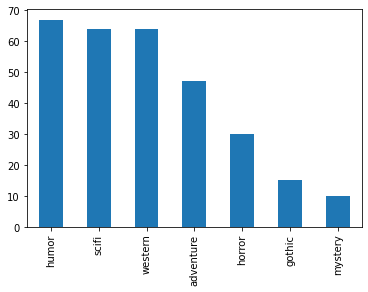

In [15]:
train_data['category'].value_counts().plot(kind='bar')

<AxesSubplot:>

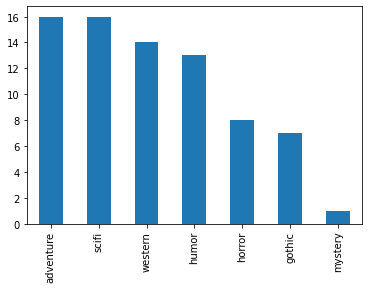

In [16]:
test_data['category'].value_counts().plot(kind='bar')

In [17]:
def line_is_marker(text):
    foundStars = '***' in text
    foundGutenberg = 'gutenberg' in text.lower()
    return (foundStars and foundGutenberg)

In [79]:
def remove_gutenberg_stuff(text):
    lines = text.splitlines()
    preamble_tag_found = False
    postscript_tag_found = False
    specialOverride = False # delete 10 lines after preamble
    c = 0
    for ndx, line in enumerate(lines):
        if (specialOverride):
            del lines[ndx]
            c += 1
            if (c == 10):
                specialOverride = False
        elif (line_is_marker(line)):
            del lines[ndx] # never need to retain a marker line
            if (not preamble_tag_found):
                preamble_tag_found = True
                specialOverride = True
            elif (not postscript_tag_found):
                postscript_tag_found = True
        elif (not preamble_tag_found):
            # haven't gotten through the preamble yet
            del lines[ndx]
        elif (postscript_tag_found):
            # we're in the postscript
            del lines[ndx]
    if (preamble_tag_found):
        # Only over-write text if we found the preamble line
        text = '\n'.join(lines)
    return text

In [115]:
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Remove preamble and postscript
    - Remove url text
    - Remove numbers
    - Removing punctuation
    - Lowering text
    - Remove non-ascii
    """
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)
    
    # remove preamble and postscript
    text = remove_gutenberg_stuff(text)
    text = re.sub(r"(distributed proofreading)", "", text)
    text = re.sub(r"(proofreading team)", "", text)
    text = re.sub(r"(proofreading)", "", text)
    text = re.sub(r"(proofread)", "", text)
    text = re.sub(r"(etext)", "", text)
    text = re.sub(r"(team pgdpnet)", "", text)
    text = re.sub(r"(pgdpnet)", "", text)
    text = re.sub(r"(transcribers note)", "", text)
    text = re.sub(r"(transcribers)", "", text)
    text = re.sub(r"(transcribe)", "", text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    
    # remove numbers including unsigned / signed integers and floats
    text = re.sub(r"[0-9]+", "", text)
    text = re.sub(r"[-0-9]+", "", text)
    text = re.sub(r"[+.0-9]+", "", text)
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    # remove url text
    text = re.sub(r"(http)*", "", text)
    text = re.sub(r"(www)*", "", text)
    
    # remove non-ascii characters
    text = re.sub(r'[^\x00-\x7F]+','', text)

    return text

In [146]:
ourStopWords = ['distributed',
                'proofreading',
                'proofread',
                'etext',
                'pgdpnet',
                'transcribers',
                'transcribe',
                'gutenberg',
                'chapter',
                'gutenbergorg',
                'online'
               ]

In [147]:
stop_words = text.ENGLISH_STOP_WORDS.union(ourStopWords)

***

### First attempt:
Using CountVectorizer and LinearSVC

In [82]:
# Transform each text into a vector of word counts
# CountVectorizer calls preprocessor, filters stopwords, and tokenizes to sparse matrix
# "Count" is a crude metric since longer books will naturally have more words
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             strip_accents="ascii",
                             max_df = 0.9, min_df = 0.2)

In [83]:
train_features = vectorizer.fit_transform(train_data["text"])    
test_features = vectorizer.transform(test_data["text"])

In [84]:
# Training
model = LinearSVC()
model.fit(train_features, train_data["category"])
y_pred_0 = model.predict(test_features)

In [85]:
# Evaluation
acc = accuracy_score(test_data["category"], y_pred_0)
print("Accuracy: {:.2f}".format(acc*100))

Accuracy: 72.00


In [86]:
#dictionary of feature indices, it's length is the number of features (words) in the data set
print(len(vectorizer.get_feature_names()))

6450


***

### Second attempt:
Using TF_IDF with 2-word ngram and LinearSVC

In [87]:
# Transform each text into a vector of word counts
# TF (Term Frequency) times IDF (Inverse Document Frequency) is better than a count vectorizer
# TF measures words by frequency to normalize for book length
# IDF reduces the weight of words that appear in many documents
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2))

train_features = vectorizer.fit_transform(train_data["text"])
test_features = vectorizer.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(train_features, train_data["category"])
y_pred_1 = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["category"], y_pred_1)

print("Accuracy with ngram: {:.2f}".format(acc*100))

Accuracy with ngram: 73.33


In [88]:
little_text = """He looked in the direction indicated and saw a doe and a spotted
fawn wading into the shallow water. The mother stood motionless a
moment, with head erect and long ears extended. Then she drooped her
graceful head and drank thirstily of the cool water. The fawn
splashed playfully round while its mother was drinking. It would
dash a few paces into the stream and then look back to see if its
mother approved. Evidently she did not, for she would stop her
drinking and call the fawn back to her side with a soft, crooning
noise. Suddenly she raised her head, the long ears shot up, and she
seemed to sniff the air. She waded through the deeper water to get
round a rocky bluff which ran out into the creek. Then she turned
and called the little one. The fawn waded until the water reached
its knees, then stopped and uttered piteous little bleats.
Encouraged by the soft crooning it plunged into the deep water and
with great splashing and floundering managed to swim the short
distance. Its slender legs shook as it staggered up the bank.
Exhausted or frightened, it shrank close to its mother. Together
they disappeared in the willows which fringed the side of the hill."""
little_test = vectorizer.transform([little_text])

In [89]:
model.predict(little_test)

array(['western'], dtype=object)

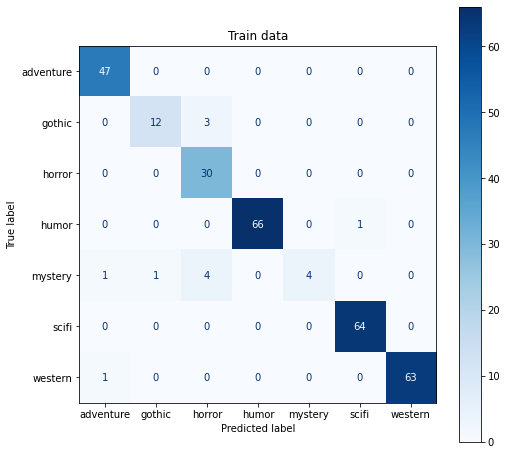

In [90]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(model, train_features, train_data["category"],
                          cmap = plt.cm.Blues,
                          normalize=None, ax=ax)
plt.title("Train data")
plt.show()

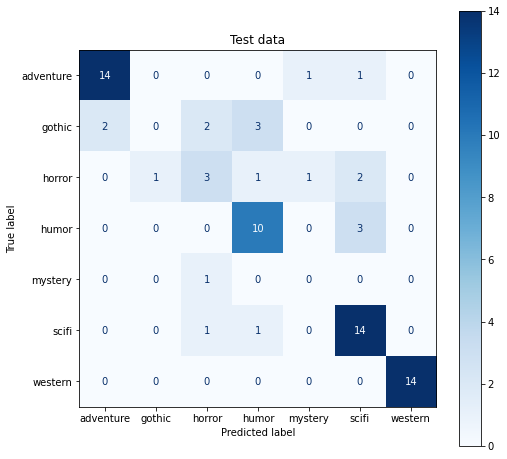

In [91]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(model, test_features, test_data["category"],
                          cmap = plt.cm.Blues,
                          normalize=None, ax=ax)
plt.title("Test data")
plt.show()

In [92]:
def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j] for j in top10)))

In [93]:
def print_topn(vectorizer, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        topn = np.argsort(clf.coef_[i])[-n:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j] for j in topn)))
        print()

In [94]:
class_labels = model.classes_
print_top10(vectorizer, model, class_labels)

adventure: elzevir, macumazahn, white fang, dartagnan, sanders, tarznmp, mp mp, sahib, dorrington, king
gothic: montoni, jekyll, opium, utterson, isabella, scythrop, heathcliff, manfred, emily, catherine
horror: room, clarke, varney, oleron, stephen, house, trelawny, dfago, villiers, did
humor: sancho, toppleton, jeeves, archie, th, bindle, mr, wuz, said, illustration
mystery: helsing, franklin, mr crisparkle, betteredge, rosa, crisparkle, mr grewgious, mr, grewgious, mr franklin
scifi: gefty, ughlomi, geo, project, ship, samms, mooney, houston, planet, walton
western: johnny, helen, fairchild, carley, ranch, donnegan, trail, casey, aint, yuh


In [95]:
class_labels = model.classes_
print_topn(vectorizer, model, class_labels, 20)

adventure: baas, ali, sapt, fang, mahatma, hans, fogg, mp, chauvelin, tarznmp tarznmp, elzevir, macumazahn, white fang, dartagnan, sanders, tarznmp, mp mp, sahib, dorrington, king

gothic: mr utterson, matilda, mrs grose, giovanni, mr glowry, hyde, glowry, marionetta, linton, tilney, montoni, jekyll, opium, utterson, isabella, scythrop, heathcliff, manfred, emily, catherine

horror: came, saw, vampyre, henriot, light, great, reginald, harold, ernest, time, room, clarke, varney, oleron, stephen, house, trelawny, dfago, villiers, did

humor: josiah, chapter minutes, miss mapp, sez, mapp, ukridge, mp chapter, mrs, minutes file, file mp, sancho, toppleton, jeeves, archie, th, bindle, mr, wuz, said, illustration

mystery: sergeant cuff, neville, bruff, stumm, rosanna, mina, blenkiron, jasper, rachel, van helsing, helsing, franklin, mr crisparkle, betteredge, rosa, crisparkle, mr grewgious, mr, grewgious, mr franklin

scifi: brad, winfree, astro, murphy, turnbull, connel, mcgill, rikud, extr

In [96]:
print(train_features.shape)
print(type(train_features))

(297, 4229497)
<class 'scipy.sparse.csr.csr_matrix'>


In [97]:
little_text = """white fang"""
little_test = vectorizer.transform([little_text])
model.predict(little_test)

array(['adventure'], dtype=object)

### Repeat second attempt:
Using TF_IDF with 2-word ngram and LinearSVC this time with min_df to eliminate very rare words<br>
(specifically character names) and max_df for very common words

In [118]:
# Transform each text into a vector of word counts
# TF (Term Frequency) times IDF (Inverse Document Frequency) is better than a count vectorizer
# TF measures words by frequency to normalize for book length
# IDF reduces the weight of words that appear in many documents
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2),
                             min_df=0.2,
                             max_df=0.9)

train_features = vectorizer.fit_transform(train_data["text"])
test_features = vectorizer.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(train_features, train_data["category"])
y_pred_1 = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["category"], y_pred_1)

print("Accuracy with ngram: {:.2f}".format(acc*100))

Accuracy with ngram: 77.33


In [119]:
little_text = """He looked in the direction indicated and saw a doe and a spotted
fawn wading into the shallow water. The mother stood motionless a
moment, with head erect and long ears extended. Then she drooped her
graceful head and drank thirstily of the cool water. The fawn
splashed playfully round while its mother was drinking. It would
dash a few paces into the stream and then look back to see if its
mother approved. Evidently she did not, for she would stop her
drinking and call the fawn back to her side with a soft, crooning
noise. Suddenly she raised her head, the long ears shot up, and she
seemed to sniff the air. She waded through the deeper water to get
round a rocky bluff which ran out into the creek. Then she turned
and called the little one. The fawn waded until the water reached
its knees, then stopped and uttered piteous little bleats.
Encouraged by the soft crooning it plunged into the deep water and
with great splashing and floundering managed to swim the short
distance. Its slender legs shook as it staggered up the bank.
Exhausted or frightened, it shrank close to its mother. Together
they disappeared in the willows which fringed the side of the hill."""
little_test = vectorizer.transform([little_text])

In [120]:
model.predict(little_test)

array(['western'], dtype=object)

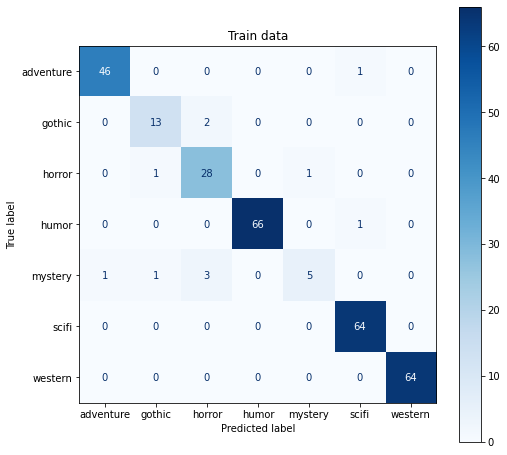

In [121]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(model, train_features, train_data["category"],
                          cmap = plt.cm.Blues,
                          normalize=None, ax=ax)
plt.title("Train data")
plt.show()

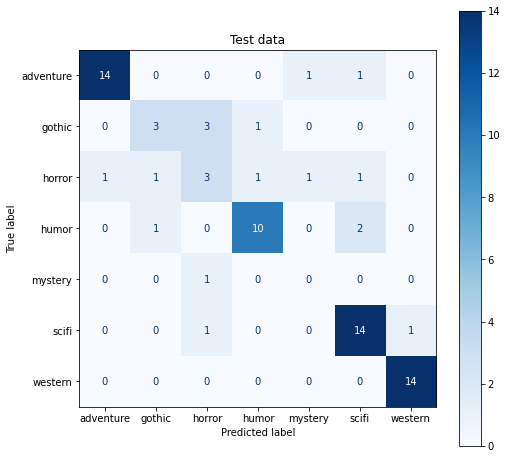

In [122]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(model, test_features, test_data["category"],
                          cmap = plt.cm.Blues,
                          normalize=None, ax=ax)
plt.title("Test data")
plt.show()

In [123]:
class_labels = model.classes_
print_top10(vectorizer, model, class_labels)

adventure: priests, la, grim, citizen, rome, blood, white, ye, bones, king
gothic: feelings, cabinet, reader, van, countenance, cried, pattern, john, lawyer, castle
horror: charles, sound, bed, bridge, strange, ghost, doctor, uncle, unto, house
humor: sort, christmas, minutes, fact, em, mrs, george, chapter, school, illustration
mystery: car, minor, length, having, thy, bells, peter, diamond, mr, van
scifi: space, screen, hed, metal, pgdpnet, team pgdpnet, earth, didnt, ship, planet
western: saddle, indian, harry, dad, indians, cabin, lane, riders, trail, aint


In [124]:
class_labels = model.classes_
print_topn(vectorizer, model, class_labels, 30)

adventure: orders, servant, dear old, colonel, english, gods, diamond, thou, priest, hut, numbers, elephant, yes, nay, paris, ah, british, government, round, france, priests, la, grim, citizen, rome, blood, white, ye, bones, king

gothic: child, wishes, chamber, affection, cousin, till, mrs, spirits, cottage, door, said old, pleasure, heights, son, old woman, father, princess, henry, madam, young lady, feelings, cabinet, reader, van, countenance, cried, pattern, john, lawyer, castle

horror: wood, jack, lady, italian, belief, feeling, church, tower, merely, lawyer, whilst, mrs, soul, hall, round, tomb, door, close, cat, maid, charles, sound, bed, bridge, strange, ghost, doctor, uncle, unto, house

humor: spirit, hearty, chap, dollars, fox, court, poet, th, major, william, governor, queen, ass, jest, idiot, iv, said mr, new york, york, sam, sort, christmas, minutes, fact, em, mrs, george, chapter, school, illustration

mystery: wild, count, thee, south, getting, manner, says, police, sa

In [125]:
print(train_features.shape)
print(type(train_features))

(297, 8374)
<class 'scipy.sparse.csr.csr_matrix'>


In [127]:
little_text = """white fang"""
little_test = vectorizer.transform([little_text])
model.predict(little_test)

array(['adventure'], dtype=object)

***

### Second attempt - part 3
Grid search for hyperparameters

In [139]:
for mindf in [0, 0.1, 0.2]:
    for maxdf in [.3]:
        vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2),
                             min_df=mindf,
                             max_df=maxdf)

        train_features = vectorizer.fit_transform(train_data["text"])
        test_features = vectorizer.transform(test_data["text"])

        # Training
        model = LinearSVC()
        model.fit(train_features, train_data["category"])
        yhat_train = model.predict(train_features)
        yhat_test = model.predict(test_features)

        # Evaluation
        acc_train = accuracy_score(train_data["category"], yhat_train)
        acc_test = accuracy_score(test_data["category"], yhat_test)

        print(mindf, maxdf, acc_train, acc_test)

0 0.3 0.9696969696969697 0.72
0.1 0.3 0.9663299663299664 0.7733333333333333
0.2 0.3 0.9663299663299664 0.8133333333333334


Very good values for hyperparameters:<br>
ngram_range=(1,2)<br>
min_df=0.2<br>
max_df=0.3<br>

In [140]:
train_features.shape

(297, 3015)

In [143]:
vectorizer.get_feature_names()

['abide copies',
 'able make',
 'aboard',
 'abode',
 'abreast',
 'abuse',
 'abyss',
 'accent',
 'accents',
 'acceptance',
 'accidental',
 'accidentally',
 'accidents',
 'accompanying',
 'accounted',
 'accuracy',
 'accurately',
 'accursed',
 'accuse',
 'ache',
 'ached',
 'achieved',
 'acknowledged',
 'acquaintances',
 'acres',
 'acute',
 'ad',
 'adjoining',
 'admirable',
 'admirably',
 'admission',
 'admitting',
 'adopt',
 'adorned',
 'afar',
 'affectionate',
 'affections',
 'afflicted',
 'afforded',
 'afoot',
 'africa',
 'aged',
 'agents',
 'aghast',
 'agin',
 'agree trademark',
 'agreement works',
 'ah said',
 'aided',
 'aint got',
 'alarming',
 'alien',
 'alight',
 'allusion',
 'almighty',
 'aloft',
 'aloof',
 'altar',
 'alternately',
 'amateur',
 'ambitious',
 'amidst',
 'ammunition',
 'amounted',
 'amuse',
 'ancestors',
 'anchor',
 'angels',
 'angles',
 'animated',
 'ankle',
 'ankles',
 'announce',
 'announcement',
 'announcing',
 'annoyance',
 'annoying',
 'anothers',
 'answer que

In [141]:
class_labels = model.classes_
print_topn(vectorizer, model, class_labels, 30)

adventure: whilst, david, majesty, lions, identical, snarled, ashore, diamonds, boats, colonel, axe, ay, regiment, corresponding, slaves, englishman, prisoners, duke, africa, december, folk, white man, priests, india, rome, elephant, hut, nay, dear old, la

gothic: passions, fancies, saint, readers, consolation, guilt, sensations, favourite, old lady, youthful, said mrs, terrace, gallery, hearth, mankind, thank god, greek, affections, nay, housekeeper, wifes, pleasures, lawyer, physician, van, princess, cabinet, cottage, heights, madam

horror: cord, abode, neighbours, recognised, council, episode, brick, gardens, coffin, lamps, lesser, luminous, theories, student, cellar, personality, inn, cupboard, candles, neighbourhood, fireplace, ghosts, grove, lawyer, occurrence, italian, tent, whilst, unto, tomb

humor: major, farmer, fiend, er, president, lookin, egg, cents, shoe, fox, vote, william, jove, visit gutenbergorg, hull, governor, wan, yer, said mrs, apple, porter, christmas, beastly

***

### Best SVC
Best hyperparameters, improved stop words

In [148]:
vectorizer = TfidfVectorizer(stop_words="english",
                     preprocessor=clean_text,
                     ngram_range=(1, 2),
                     min_df=0.2,
                     max_df=0.3)

train_features = vectorizer.fit_transform(train_data["text"])
test_features = vectorizer.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(train_features, train_data["category"])
yhat_train = model.predict(train_features)
yhat_test = model.predict(test_features)

# Evaluation
acc_train = accuracy_score(train_data["category"], yhat_train)
acc_test = accuracy_score(test_data["category"], yhat_test)

print("Train accuracy: ", acc_train)
print("Train accuracy: ", acc_test)

Train accuracy:  0.9663299663299664
Train accuracy:  0.8133333333333334


In [153]:
train_features.shape, test_features.shape

((297, 3015), (75, 3015))

In [150]:
vectorizer.get_feature_names()

['abide copies',
 'able make',
 'aboard',
 'abode',
 'abreast',
 'abuse',
 'abyss',
 'accent',
 'accents',
 'acceptance',
 'accidental',
 'accidentally',
 'accidents',
 'accompanying',
 'accounted',
 'accuracy',
 'accurately',
 'accursed',
 'accuse',
 'ache',
 'ached',
 'achieved',
 'acknowledged',
 'acquaintances',
 'acres',
 'acute',
 'ad',
 'adjoining',
 'admirable',
 'admirably',
 'admission',
 'admitting',
 'adopt',
 'adorned',
 'afar',
 'affectionate',
 'affections',
 'afflicted',
 'afforded',
 'afoot',
 'africa',
 'aged',
 'agents',
 'aghast',
 'agin',
 'agree trademark',
 'agreement works',
 'ah said',
 'aided',
 'aint got',
 'alarming',
 'alien',
 'alight',
 'allusion',
 'almighty',
 'aloft',
 'aloof',
 'altar',
 'alternately',
 'amateur',
 'ambitious',
 'amidst',
 'ammunition',
 'amounted',
 'amuse',
 'ancestors',
 'anchor',
 'angels',
 'angles',
 'animated',
 'ankle',
 'ankles',
 'announce',
 'announcement',
 'announcing',
 'annoyance',
 'annoying',
 'anothers',
 'answer que

In [151]:
class_labels = model.classes_
print_topn(vectorizer, model, class_labels, 30)

adventure: whilst, david, majesty, lions, identical, snarled, ashore, diamonds, boats, colonel, axe, ay, regiment, corresponding, slaves, englishman, prisoners, duke, africa, december, folk, white man, priests, india, rome, elephant, hut, nay, dear old, la

gothic: passions, fancies, saint, readers, consolation, guilt, sensations, favourite, old lady, youthful, said mrs, terrace, gallery, hearth, mankind, thank god, greek, affections, nay, housekeeper, wifes, pleasures, lawyer, physician, van, princess, cabinet, cottage, heights, madam

horror: cord, abode, neighbours, recognised, council, episode, brick, gardens, coffin, lamps, lesser, luminous, theories, student, cellar, personality, inn, cupboard, candles, neighbourhood, fireplace, ghosts, grove, lawyer, occurrence, italian, tent, whilst, unto, tomb

humor: major, farmer, fiend, er, president, lookin, egg, cents, shoe, fox, vote, william, jove, visit gutenbergorg, hull, governor, wan, yer, said mrs, apple, porter, christmas, beastly

In [ ]:
all_features = vectorizer.transform(all_data["text"])
all_features.shape

In [152]:
#vectorizer.get_stop_words()

***

### Third attempt
MultinomialNB

In [ ]:
clf = MultinomialNB().fit(train_features, train_data["category"])
y_pred_2 = clf.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["category"], y_pred_2)

print("Accuracy: {:.2f}".format(acc*100))

***

### Fourth attempt
SGDClassifier

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                         alpha=1e-3, random_state=42,
                         max_iter=5, tol=None)),
])

In [ ]:
text_clf.fit(train_data["text"], train_data["category"])
y_pred_3 = text_clf.predict(test_data["text"])

# Evaluation
acc = accuracy_score(test_data["category"], y_pred_3)

print("Accuracy: {:.2f}".format(acc*100))

***

### Fifth attempt
Grid search over MultinomialNB's hyperparameters

In [ ]:
text_clf_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [ ]:
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__fit_prior': (True, False),
    'clf__alpha': (0, 1e-2, 1e-3, 0.5, 1.0)
}

In [ ]:
gs_clf_nb = GridSearchCV(text_clf_nb, parameters, cv=5, n_jobs=-1)

In [ ]:
gs_clf_nb = gs_clf_nb.fit(train_data["text"], train_data["category"])

In [ ]:
gs_clf_nb.best_params_

Best parameters:<br>
{'clf__alpha': 0.001, 'clf__fit_prior': True, 'vect__ngram_range': (1, 1)}

In [ ]:
nb_best = gs_clf_nb.best_estimator_

In [ ]:
y_pred_4 = nb_best.predict(df_test["text"])

# Evaluation
acc = accuracy_score(df_test["category"], y_pred_4)

print("Accuracy: {:.2f}".format(acc*100))

In [ ]:
print(classification_report(df_test["category"], y_pred_4))

In [ ]:
unique_label = list(df_test["category"].unique())
cmtx = pd.DataFrame(confusion_matrix(df_test["category"], y_pred_4, labels= unique_label),
                    index=['true:{:}'.format(x) for x in unique_label], 
                    columns=['pred:{:}'.format(x) for x in unique_label])
print(cmtx)